In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

In [3]:
print("="*55)
print("IDENTITAS MAHASISWA".center(55))
print("="*55)

identitas = [
    {
        "Nama": "Naufal Aflah Izdihar",
        "NIM": "41524010121"
    },
    {
        "Nama": "Rafly Prasetya",
        "NIM": "41524010122"
    },
    {
        "Nama": "Arif Suryo Utomo",
        "NIM": "41524010150"
    }
]

for i, mhs in enumerate(identitas, start=1):
    print(f"Mahasiswa {i}")
    print(f"  Nama : {mhs['Nama']}")
    print(f"  NIM  : {mhs['NIM']}")
    print("-"*55)

print("Kelas Mata Kuliah : Sains Data")
print("Jadwal            : Rabu, 10:15 - 12:45")
print("Dosen Pengampu    : Inna Sabily Karima S.Kom., M.Kom")
print("Sumber Dataset    : https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset")
print("="*55)


                  IDENTITAS MAHASISWA                  
Mahasiswa 1
  Nama : Naufal Aflah Izdihar
  NIM  : 41524010121
-------------------------------------------------------
Mahasiswa 2
  Nama : Rafly Prasetya
  NIM  : 41524010122
-------------------------------------------------------
Mahasiswa 3
  Nama : Arif Suryo Utomo
  NIM  : 41524010150
-------------------------------------------------------
Kelas Mata Kuliah : Sains Data
Jadwal            : Rabu, 10:15 - 12:45
Dosen Pengampu    : Inna Sabily Karima S.Kom., M.Kom
Sumber Dataset    : https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset


In [8]:
df = pd.read_csv('/content/Students Performance Dataset.csv')
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [9]:
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,21.048400,75.356076,70.701924,69.546552,74.956320,74.836214,49.963720,74.78305,71.652097,17.521140,5.507200,6.514420
std,1.989786,14.392716,17.436325,17.108996,14.404287,14.423848,28.989785,14.54243,7.230097,7.193035,2.886662,1.446155
min,18.000000,50.010000,40.000000,40.010000,50.000000,50.000000,0.000000,50.00000,50.602000,5.000000,1.000000,4.000000
25%,19.000000,62.945000,55.707500,54.697500,62.340000,62.357500,25.075000,61.97000,66.533875,11.500000,3.000000,5.300000
50%,21.000000,75.670000,70.860000,69.485000,75.090000,74.905000,49.600000,74.54000,71.696250,17.400000,6.000000,6.500000
75%,23.000000,87.862500,85.760000,83.922500,87.352500,87.292500,75.500000,87.63000,76.711625,23.700000,8.000000,7.800000
max,24.000000,100.000000,99.990000,99.980000,99.990000,99.990000,100.000000,100.00000,95.091500,30.000000,10.000000,9.000000


In [10]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0


In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    if df[col].isna().sum() > 0:
        if not df[col].mode().empty:
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna("unknown")


In [12]:
df.isnull().sum()

,0
Student_ID,0
First_Name,0
Last_Name,0
Email,0
Gender,0
Age,0
Department,0
Attendance (%),0
Midterm_Score,0
Final_Score,0


In [13]:
df.columns = df.columns.str.replace(" ", "_").str.lower()
df.columns

Index(['student_id', 'first_name', 'last_name', 'email', 'gender', 'age',
       'department', 'attendance_(%)', 'midterm_score', 'final_score',
       'assignments_avg', 'quizzes_avg', 'participation_score',
       'projects_score', 'total_score', 'grade', 'study_hours_per_week',
       'extracurricular_activities', 'internet_access_at_home',
       'parent_education_level', 'family_income_level', 'stress_level_(1-10)',
       'sleep_hours_per_night'],
      dtype='object')

In [14]:
df = df.drop(columns=['student_id', 'first_name', 'last_name', 'email'], errors='ignore')

In [15]:
df_before_encoding = df.copy()

In [16]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = [
    'gender',
    'department',
    'grade',
    'extracurricular_activities',
    'internet_access_at_home',
    'parent_education_level',
    'family_income_level'
]

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [17]:
print("--- SEBELUM ---")
original_categorical_cols = [
    'gender',
    'department',
    'grade',
    'extracurricular_activities',
    'internet_access_at_home',
    'parent_education_level',
    'family_income_level'
]
display(df_before_encoding[original_categorical_cols].head())

print("\n--- SESUDAH ---")
display(df[categorical_cols].head())

--- SEBELUM ---


,gender,department,grade,extracurricular_activities,internet_access_at_home,parent_education_level,family_income_level
0,Female,Mathematics,F,Yes,No,Master's,Medium
1,Male,Business,B,No,No,High School,Low
2,Male,Engineering,D,Yes,No,High School,Low
3,Female,Engineering,F,No,Yes,High School,Low
4,Female,CS,C,Yes,No,Master's,Medium



--- SESUDAH ---


,gender,department,grade,extracurricular_activities,internet_access_at_home,parent_education_level,family_income_level
0,0,3,4,1,0,2,2
1,1,0,1,0,0,1,1
2,1,2,3,1,0,1,1
3,0,2,4,0,1,1,1
4,0,1,2,1,0,2,2


In [18]:
X = df.drop('grade', axis=1)
y = df['grade']

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [20]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=2000,
    multi_class='auto'
)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=2000, multi_class='auto')

In [21]:
y_pred = model.predict(X_test)

In [22]:
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1 Score :", f1_score(y_test, y_pred, average='macro'))

Accuracy : 0.801
Precision: 0.6666981108639739
Recall   : 0.5775261586030006
F1 Score : 0.60640825174237


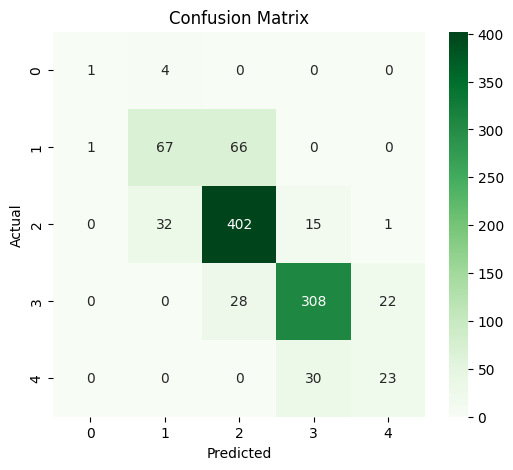

In [24]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.65      0.50      0.57       134
           2       0.81      0.89      0.85       450
           3       0.87      0.86      0.87       358
           4       0.50      0.43      0.46        53

    accuracy                           0.80      1000
   macro avg       0.67      0.58      0.61      1000
weighted avg       0.79      0.80      0.79      1000



In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [27]:
X = df.select_dtypes(include=[np.number])

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)
print("Total Variance Explained:", pca.explained_variance_ratio_.sum())

Explained Variance Ratio:
[0.15233758 0.05847921]
Total Variance Explained: 0.2108167907461455


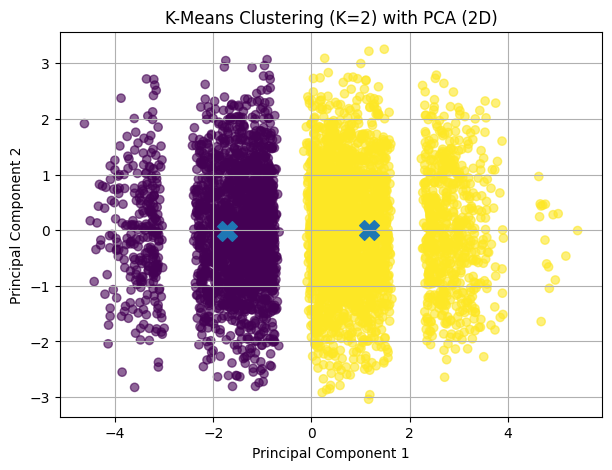

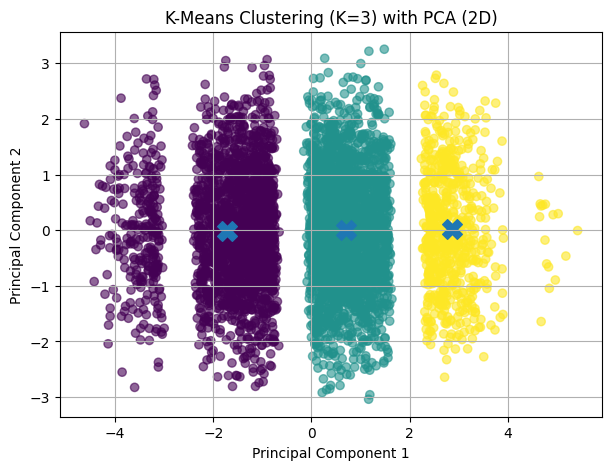

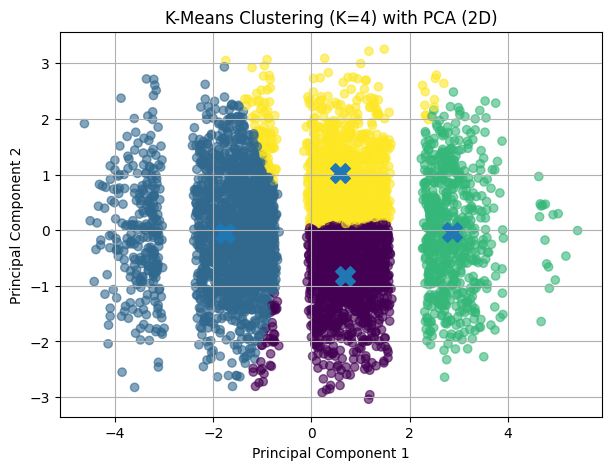

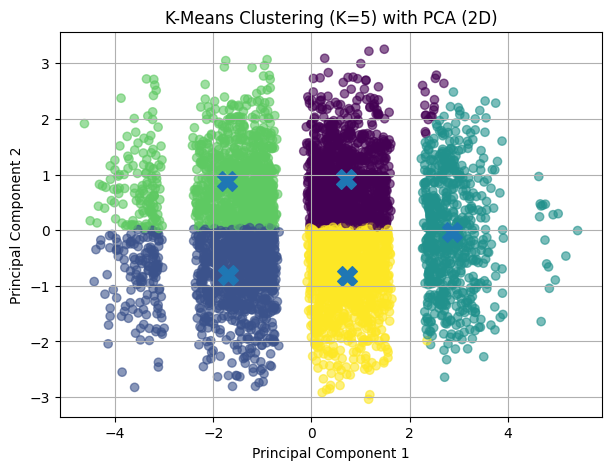

In [30]:
for k in range(2, 6):
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )

    labels = kmeans.fit_predict(X_pca)
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(7, 5))
    plt.scatter(
        X_pca[:, 0],
        X_pca[:, 1],
        c=labels,
        alpha=0.6
    )

    plt.scatter(
        centroids[:, 0],
        centroids[:, 1],
        marker='X',
        s=200
    )

    plt.title(f"K-Means Clustering (K={k}) with PCA (2D)")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()